In [3]:
import pandas as pd

# Login using e.g. `huggingface-cli login` to access this dataset
df = pd.read_csv("hf://datasets/giseldo/deep-se/deep-se.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23313 entries, 0 to 23312
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   project      23313 non-null  object
 1   issuekey     23313 non-null  object
 2   title        23313 non-null  object
 3   description  21082 non-null  object
 4   storypoint   23313 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 910.8+ KB


In [5]:
df.head()

,project,issuekey,title,description,storypoint
0,appceleratorstudio,TISTUD-6,Add CA against object literals in function inv...,{html}<div><p>The idea here is that if our met...,1
1,appceleratorstudio,TISTUD-9,Update branding for Appcelerator plugin to App...,"{html}<div><p>At least fix feature icons, asso...",1
2,appceleratorstudio,TISTUD-11,Create new JSON schema for SDK team,{html}<div><p>Create JSON schema containing pr...,1
3,appceleratorstudio,TISTUD-13,Create Project References Property Page,{html}<div><p>Create property page for project...,1
4,appceleratorstudio,TISTUD-16,New Desktop Project Wizard,{html}<div><p>Desktop (need to convert existin...,1


In [6]:
df['context'] = df['title'] + " " + df['description']
df.head()

,project,issuekey,title,description,storypoint,context
0,appceleratorstudio,TISTUD-6,Add CA against object literals in function inv...,{html}<div><p>The idea here is that if our met...,1,Add CA against object literals in function inv...
1,appceleratorstudio,TISTUD-9,Update branding for Appcelerator plugin to App...,"{html}<div><p>At least fix feature icons, asso...",1,Update branding for Appcelerator plugin to App...
2,appceleratorstudio,TISTUD-11,Create new JSON schema for SDK team,{html}<div><p>Create JSON schema containing pr...,1,Create new JSON schema for SDK team {html}<div...
3,appceleratorstudio,TISTUD-13,Create Project References Property Page,{html}<div><p>Create property page for project...,1,Create Project References Property Page {html}...
4,appceleratorstudio,TISTUD-16,New Desktop Project Wizard,{html}<div><p>Desktop (need to convert existin...,1,New Desktop Project Wizard {html}<div><p>Deskt...


In [9]:
import tiktoken

# Initialize the tokenizer
# You can choose different encodings depending on your model
# For GPT-2, gpt-3, etc. 'gpt2' is common
enc = tiktoken.get_encoding("gpt2")

# Function to count tokens
def count_tokens(text):
  if pd.isna(text): # Handle potential NaN values
    return 0
  return len(enc.encode(text))

# Apply the function to the 'context' column
df['context_token_count'] = df['context'].apply(count_tokens)

# Calculate the mean of the token counts
mean_tokens = df['context_token_count'].mean()

print(f"A média da quantidade de tokens na coluna 'context' é: {mean_tokens}")

A média da quantidade de tokens na coluna 'context' é: 225.56114614163772


In [27]:
total_tokens = df["context_token_count"].sum()

print(f"A soma de tokens é igual a: {total_tokens:.0f}")

A soma de tokens é igual a: 5258507


In [29]:
media_tokens = df["context_token_count"].mean()
print(f"A média de tokens do conjunto de dados é igual a: {media_tokens:.0f}")

A média de tokens do conjunto de dados é igual a: 226


In [31]:
print("\nEstatísticas Descritivas da Quantidade de Tokens por User Story:")
print(df['context_token_count'].describe())


Estatísticas Descritivas da Quantidade de Tokens por User Story:
count    23313.000000
mean       225.561146
std        690.496706
min          0.000000
25%         40.000000
50%         77.000000
75%        154.000000
max      16697.000000
Name: context_token_count, dtype: float64


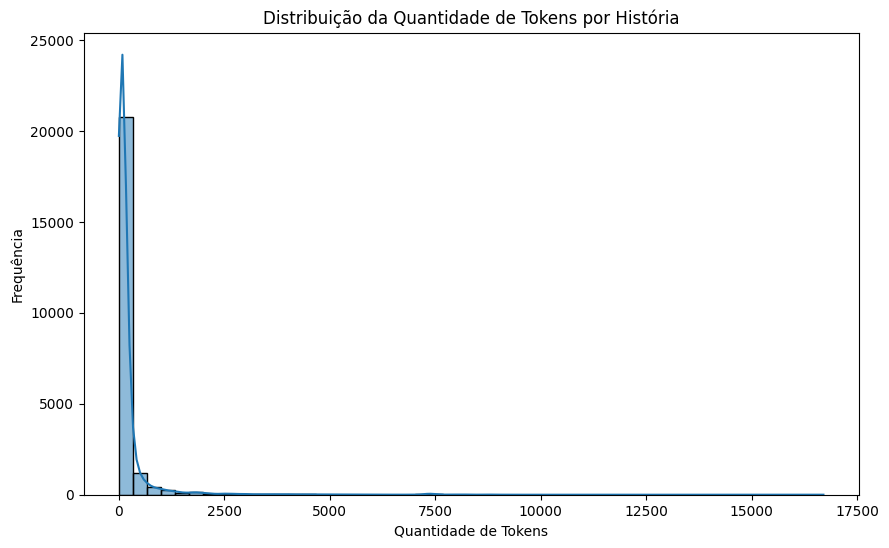

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of token counts
plt.figure(figsize=(10, 6))
sns.histplot(df['context_token_count'], bins=50, kde=True)
plt.title('Distribuição da Quantidade de Tokens por História')
plt.xlabel('Quantidade de Tokens')
plt.ylabel('Frequência')
plt.show()

In [ ]:
# Quantas historias tem quantidade de tokens maior que 128?

# Filter rows where the token count is greater than 128
count_greater_than_128 = (df['context_token_count'] > 128).sum()

print(f"A quantidade de histórias com mais de 128 tokens é: {count_greater_than_128}")

A quantidade de histórias com mais de 128 tokens é: 7215


In [ ]:
# Quantas historias tem quantidade de tokens maior que 128?

# Filter rows where the token count is greater than 128
count_greater_than_128 = (df['context_token_count'] <= 128).sum()

print(f"A quantidade de histórias com menos de 128 tokens é: {count_greater_than_128}")


A quantidade de histórias com menos de 128 tokens é: 16098


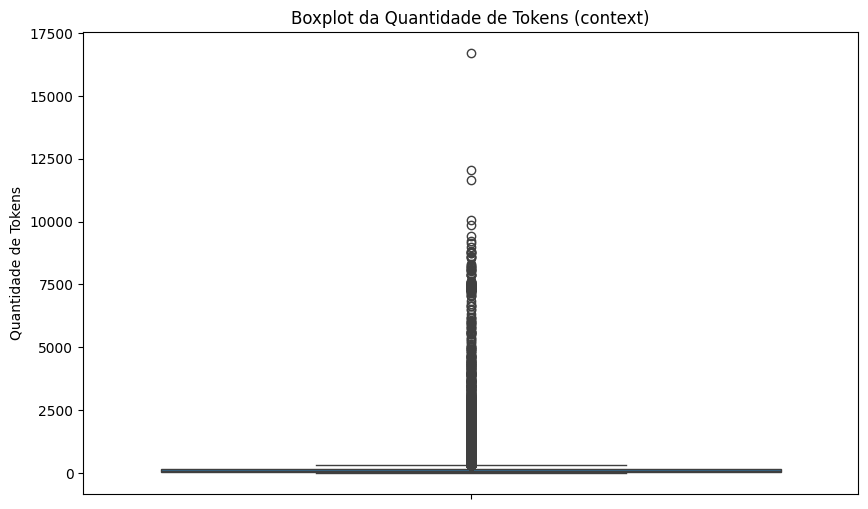

In [36]:
# Boxpolot da coluna context_token_count

plt.figure(figsize=(10, 6))
sns.boxplot(y=df['context_token_count'])
plt.title('Boxplot da Quantidade de Tokens (context)')
plt.ylabel('Quantidade de Tokens')
plt.show()